<a href="https://colab.research.google.com/github/scarlxrd54288/Laboratorio-02---Rodriguez-Medina-Leyla-Camila/blob/main/Laboratorio_2_Rodriguez_Medina_Leyla_Camila_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Regresión Lineal Multiple

In [ ]:
# Importa módulos para la gestión de directorios y rutas
import os

# Librerías para operaciones vectoriales y cálculos científicos en Python
import numpy as np
import pandas as pd
from IPython.display import display

# Librerías para la creación y visualización de gráficos
from matplotlib import pyplot
from mpl_toolkits.mplot3d import Axes3D  # Requerido para la representación de superficies en 3D

# Configura matplotlib para mostrar gráficos directamente en los cuadernos de Jupyter
%matplotlib inline

In [ ]:
# Importa el módulo de Google Colab para montar Google Drive
from google.colab import drive

# Monta Google Drive en el directorio especificado para acceder a archivos
drive.mount("/content/gdrive")

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


## 2 Regresión lineal con multiples variables



<a id="section4"></a>
### 2.1 Normalización de caracteristicas
Este código carga un archivo CSV en un DataFrame de pandas y luego imprime el número total de columnas y sus nombres. A continuación, elimina una columna específica, cuyo índice se define, y guarda el DataFrame modificado en un nuevo archivo CSV. Luego, trabaja con el DataFrame actualizado, extrayendo las primeras 30 columnas y la columna en el índice 30, para usar estos datos en el análisis posterior. Finalmente, imprime la cantidad de datos en la columna objetivo.


In [ ]:
# Cargar el archivo CSV original en un DataFrame
df = pd.read_csv('/creditcard.csv', delimiter=',', decimal='.')

# Imprimir el número total de columnas y los nombres de las columnas para referencia
print("Número de columnas:", len(df.columns))
print("Nombres de las columnas:", df.columns.tolist())

# Establecer el índice de la columna que se desea eliminar (por ejemplo, el índice 6)
column_index = 30  # Modifica este valor según el índice de la columna a eliminar

# Comprobar si el índice especificado es válido
if column_index < len(df.columns):
    # Eliminar la columna en el índice indicado
    sin = df.drop(df.columns[column_index], axis=1)

    # Mostrar información del DataFrame después de la eliminación de la columna
    print("DataFrame después de eliminar la columna con índice", column_index, ":")
    sin.info()

    # Guardar el DataFrame modificado en un nuevo archivo CSV
    sin.to_csv('/content/test_modificado.csv', index=False)
    print("DataFrame modificado guardado exitosamente.")
else:
    print(f"Índice {column_index} fuera de rango. El DataFrame tiene {len(df.columns)} columnas.")

# Trabajar con el DataFrame modificado
# Extraer las primeras 30 columnas (hasta el índice 29) y la columna en el índice 30
X = sin.iloc[:, :29].values
y = sin.iloc[:, 29].values

# Obtener el tamaño del array y
m = y.size
print("Cantidad de datos en la columna y:", m)


Número de columnas: 31
Nombres de las columnas: ['Time', 'V1', 'V2', 'V3', 'V4', 'V5', 'V6', 'V7', 'V8', 'V9', 'V10', 'V11', 'V12', 'V13', 'V14', 'V15', 'V16', 'V17', 'V18', 'V19', 'V20', 'V21', 'V22', 'V23', 'V24', 'V25', 'V26', 'V27', 'V28', 'Amount', 'Class']
DataFrame después de eliminar la columna con índice 30 :
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 107046 entries, 0 to 107045
Data columns (total 30 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    107046 non-null  int64  
 1   V1      107046 non-null  float64
 2   V2      107046 non-null  float64
 3   V3      107046 non-null  float64
 4   V4      107046 non-null  float64
 5   V5      107046 non-null  float64
 6   V6      107046 non-null  float64
 7   V7      107046 non-null  float64
 8   V8      107046 non-null  float64
 9   V9      107046 non-null  float64
 10  V10     107046 non-null  float64
 11  V11     107046 non-null  float64
 12  V12     107046 non-null  float64

Se reemplazan los valores faltantes (NaN) en el DataFrame con la media de cada columna. Luego, convierte el DataFrame en un array de numpy para facilitar su uso en cálculos numéricos. A continuación, define una función para normalizar los datos: calcula la media y la desviación estándar de cada columna, ajusta la desviación estándar para evitar problemas de división por cero, y luego normaliza los datos para que tengan una media de 0 y una desviación estándar de 1. La función devuelve los datos normalizados junto con la media y desviación estándar usadas en el proceso.

In [ ]:
# Sustituir los valores NaN con la media de cada columna en el DataFrame
sin.fillna(df.mean(), inplace=True)

# Convertir el DataFrame en un array de numpy si se requiere
X = sin.to_numpy()

def featureNormalize(X):
    # Calcular la media de cada columna
    mu = np.mean(X, axis=0)
    # Calcular la desviación estándar de cada columna
    sigma = np.std(X, axis=0)
    # Reemplazar ceros en sigma para evitar problemas de división por cero
    sigma = np.where(sigma == 0, 1, sigma)
    # Normalizar los datos
    X_norm = (X - mu) / sigma
    return X_norm, mu, sigma

In [ ]:
# Normalizar los datos utilizando la función definida
X_norm, mu, sigma = featureNormalize(X)

# Imprimir los datos originales para referencia
print("Datos originales:\n", X)
# Mostrar la media calculada de cada columna
print("Media calculada:", mu)
# Mostrar la desviación estándar calculada de cada columna
print("Desviación estándar calculada:", sigma)
# Imprimir los datos después de la normalización
print("Datos normalizados:\n", X_norm)

Datos originales:
 [[ 0.00000000e+00 -1.35980713e+00 -7.27811733e-02 ...  1.33558377e-01
  -2.10530535e-02  1.49620000e+02]
 [ 0.00000000e+00  1.19185711e+00  2.66150712e-01 ... -8.98309914e-03
   1.47241692e-02  2.69000000e+00]
 [ 1.00000000e+00 -1.35835406e+00 -1.34016307e+00 ... -5.53527940e-02
  -5.97518406e-02  3.78660000e+02]
 ...
 [ 7.02540000e+04  1.15559460e+00  2.62673764e-01 ... -9.95266154e-03
   1.93995835e-02  1.98000000e+00]
 [ 7.02550000e+04  7.96109767e-01 -1.52144099e+00 ...  2.45172509e-02
   6.68477573e-02  3.06500000e+02]
 [ 7.02560000e+04  7.20549911e-01 -1.11779476e+00 ...  1.02425200e-01
   1.63985639e-03  9.62017779e+01]]
Media calculada: [ 4.41631934e+04 -2.57831414e-01 -2.65604236e-02  6.82250216e-01
  1.57008861e-01 -2.83548036e-01  9.80765439e-02 -1.16248634e-01
  5.88256510e-02 -5.43321705e-02 -2.00813800e-02  2.36667469e-01
 -5.12319308e-02 -5.08815648e-03  4.60389704e-02  1.90182648e-01
 -3.31476211e-03  5.87622903e-02 -9.71327152e-02 -1.85570447e-02
  4

Despues de `featureNormalize` la funcion es provada, se añade el temino de interseccion a `X_norm`:

In [ ]:
# Agregar una columna de unos a X para el término de intersección (X0)
# Esto permite incluir el término de intersección en el modelo de regresión
X = np.concatenate([np.ones((m, 1)), X_norm], axis=1)

In [ ]:
# Imprimir el array X para visualizar la matriz de características con la columna de intersección añadida
print(X)

[[ 1.00000000e+00 -2.49256903e+00 -5.94652909e-01 ...  3.36623155e-01
  -7.08907607e-02  2.04603839e-01]
 [ 1.00000000e+00 -2.49256903e+00  7.82287199e-01 ... -2.70090954e-02
   4.08743037e-02 -3.58171201e-01]
 [ 1.00000000e+00 -2.49251259e+00 -5.93868796e-01 ... -1.45301097e-01
  -1.91782549e-01  1.08187870e+00]
 ...
 [ 1.00000000e+00  1.47256418e+00  7.62719065e-01 ... -2.94825099e-02
   5.54799088e-02 -3.60890661e-01]
 [ 1.00000000e+00  1.47262062e+00  5.68732304e-01 ...  5.84524001e-02
   2.03704053e-01  8.05489624e-01]
 [ 1.00000000e+00  1.47267706e+00  5.27958367e-01 ...  2.57200468e-01
   0.00000000e+00 -5.44307789e-17]]


<a id="section5"></a>
### 2.2 Descenso por el gradiente



La siguiente función calcula el costo de un modelo de regresión lineal múltiple. Primero, determina el número de ejemplos en el conjunto de datos. Luego, utiliza los parámetros del modelo (`theta`) para hacer predicciones basadas en las características (`X`). Calcula el error entre estas predicciones y los valores reales (`y`). Finalmente, calcula el costo, que es el promedio del error cuadrático, proporcionando una medida de cuán bien el modelo está ajustado a los datos.

In [ ]:
def computeCostMulti(X, y, theta):
    # Obtener el número de ejemplos
    m = len(y)
    # Calcular las predicciones usando los parámetros theta
    predictions = np.dot(X, theta)
    # Calcular el error entre las predicciones y los valores reales
    errors = predictions - y
    # Calcular el costo (función de costo) como el promedio del error cuadrático
    cost = (1 / (2 * m)) * np.dot(errors.T, errors)
    return cost

Esta función realiza el descenso por gradiente para optimizar los parámetros (`theta`) de un modelo de regresión lineal múltiple. Primero, determina el número total de ejemplos y crea una lista para registrar el costo durante cada iteración. Luego, en cada iteración, calcula las predicciones actuales, el error entre estas predicciones y los valores reales, y el gradiente de la función de costo. Actualiza los parámetros del modelo usando el gradiente y la tasa de aprendizaje (`alpha`). Finalmente, guarda el costo calculado para los parámetros actualizados en el historial. La función devuelve los parámetros optimizados y el historial de costos.

In [ ]:
def gradientDescentMulti(X, y, theta, alpha, num_iters):
    m = len(y)  # Número total de ejemplos
    J_history = []  # Lista para almacenar el historial de costos durante la optimización

    for i in range(num_iters):
        # Calcular las predicciones con los parámetros actuales
        predictions = np.dot(X, theta)
        # Calcular el error entre las predicciones y los valores reales
        errors = predictions - y
        # Calcular el gradiente de la función de costo
        gradient = (1 / m) * np.dot(X.T, errors)
        # Actualizar los parámetros theta utilizando el gradiente y la tasa de aprendizaje
        theta = theta - alpha * gradient
        # Registrar el costo actual en el historial
        J_history.append(computeCostMulti(X, y, theta))

    return theta, J_history

#### 3.2.1 Seleccionando coheficientes de aprendizaje
Esta  celda realiza la generación y predicción de datos en un modelo de regresión lineal después de desnormalizar y normalizar las características.

1. **Desnormalización**: Primero, genera valores aleatorios en el rango de [-1, 1] y luego los desnormaliza usando las medias (`mu`) y desviaciones estándar (`sigma`) originales para devolverlos a la escala de los datos originales.

2. **Preparación de Datos**: Añade una columna de unos a los datos desnormalizados para el término de intersección del modelo. Luego, normaliza las características (excluyendo la columna de unos) para que coincidan con las que se utilizaron durante el entrenamiento del modelo.

3. **Predicción**: Utiliza los parámetros del modelo (`theta`) para hacer predicciones sobre los datos normalizados.

4. **Resultados**: Muestra las primeras 5 predicciones y opcionalmente imprime estadísticas básicas como el promedio y la desviación estándar de las predicciones.

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# Definir una función para revertir la normalización de las características
def denormalize(X_norm, mu, sigma):
    return X_norm * sigma + mu

# Supongamos que ya tenemos calculados mu, sigma y theta
# Ejemplo de valores:
mu = np.array([0, 0, 0])  # Media de cada característica en el dataset original
sigma = np.array([1, 1, 1])  # Desviación estándar de cada característica en el dataset original
theta = np.array([1, 0.5, -0.5, 2])  # Parámetros del modelo de regresión

# Número de características (excluyendo la columna de intersección)
num_features = len(mu)

# Número de predicciones a generar
num_predictions = 100

# Generar valores aleatorios en el rango [-1, 1]
np.random.seed(0)  # Para asegurar reproducibilidad
random_values = np.random.rand(num_predictions, num_features) * 2 - 1  # Valores en el intervalo [-1, 1]

# Desnormalizar los valores aleatorios para que coincidan con la escala original del dataset
random_values = denormalize(random_values, mu, sigma)

# Añadir una columna de unos para el término de intersección en el modelo
X_with_intercept = np.concatenate([np.ones((num_predictions, 1)), random_values], axis=1)

# Normalizar las características para que se alineen con el modelo
# Normalizamos solo las características (excluyendo la columna de intersección)
X_norm, mu, sigma = featureNormalize(X_with_intercept[:, 1:])  # Normalizar características
X_with_intercept = np.concatenate([np.ones((num_predictions, 1)), X_norm], axis=1)  # Reconstruir el conjunto de datos con la columna de unos

# Realizar predicciones utilizando los parámetros del modelo
prices = np.dot(X_with_intercept, theta)

# Mostrar las primeras 5 predicciones
for i in range(5):
    print(f"Predicción {i+1}: ${prices[i]:.0f}")

# Opcional: Imprimir estadísticas básicas de las predicciones
print(f"\nPromedio de las predicciones: ${np.mean(prices):.0f}")
print(f"Desviación estándar de las predicciones: ${np.std(prices):.0f}")

Predicción 1: $1
Predicción 2: $2
Predicción 3: $3
Predicción 4: $0
Predicción 5: $-3

Promedio de las predicciones: $1
Desviación estándar de las predicciones: $2


Se realiza los siguientes pasos para generar y analizar predicciones con un modelo de regresión lineal:

1. **Generación de Datos Aleatorios**: Crea 100 conjuntos de datos aleatorios dentro del rango de [-1, 1] para cada característica, imitando la distribución del dataset original.

2. **Desnormalización**: Ajusta estos datos aleatorios para que coincidan con la escala original del dataset usando las medias (`mu`) y desviaciones estándar (`sigma`) calculadas previamente.

3. **Preparación del Modelo**: Añade una columna de unos a los datos desnormalizados para representar el término de intersección en el modelo de regresión. Luego, normaliza estas características para que coincidan con las características usadas en el entrenamiento del modelo.

4. **Predicción**: Usa los parámetros del modelo (`theta`) para calcular las predicciones sobre los datos normalizados.

5. **Resultados**: Muestra las primeras 5 predicciones y calcula el promedio y la desviación estándar de todas las predicciones para dar una idea general de los resultados.

In [ ]:
# Suponiendo que ya tenemos calculados `mu`, `sigma` y `theta`
# Número de características (excluyendo la columna de intersección)
num_features = len(mu)

# Generar datos aleatorios que imiten el rango de los datos del dataset original
# Utilizamos una semilla para asegurar resultados reproducibles
np.random.seed(0)  # Garantiza reproducibilidad
num_predictions = 100

# Crear valores aleatorios para cada característica en el intervalo [-1, 1]
random_values = np.random.rand(num_predictions, num_features) * 2 - 1  # Valores entre -1 y 1

# Desnormalizar los valores aleatorios para que se ajusten a la escala original del dataset
# Primero revertimos la normalización: valores_aleatorios * sigma + mu
random_values = random_values * sigma + mu

# Añadir una columna de unos para el término de intersección en el modelo
X_with_intercept = np.concatenate([np.ones((num_predictions, 1)), random_values], axis=1)

# Normalizar las características para que coincidan con el modelo
# Solo normalizamos las características (excluyendo la columna de unos)
X_norm, _, _ = featureNormalize(X_with_intercept[:, 1:])  # Normalizar características
X_with_intercept = np.concatenate([np.ones((num_predictions, 1)), X_norm], axis=1)  # Reconstruir el conjunto de datos con la columna de unos

# Realizar predicciones utilizando los parámetros del modelo
prices = np.dot(X_with_intercept, theta)

# Imprimir las primeras 5 predicciones
for i in range(5):
    print(f"Predicción {i+1}: ${prices[i]:.0f}")

# Imprimir estadísticas básicas de las predicciones
print(f"\nPromedio de las predicciones: ${np.mean(prices):.0f}")
print(f"Desviación estándar de las predicciones: ${np.std(prices):.0f}")


Predicción 1: $1
Predicción 2: $2
Predicción 3: $3
Predicción 4: $0
Predicción 5: $-3

Promedio de las predicciones: $1
Desviación estándar de las predicciones: $2


<a id="section7"></a>
### 2.3 Ecuacion de la Normal

Una manera de calcular rapidamente el modelo de una regresion lineal es:

$$ \theta = \left( X^T X\right)^{-1} X^T\vec{y}$$

Utilizando esta formula no requiere que se escale ninguna caracteristica, y se obtendra una solucion exacta con un solo calculo: no hay “bucles de convergencia” como en el descenso por el gradiente.

Primero se recargan los datos para garantizar que las variables no esten modificadas. Recordar que no es necesario escalar las caracteristicas, se debe agregar la columna de unos a la matriz $X$ para tener el termino de intersección($\theta_0$).

In [ ]:
# Cargar datos del archivo CSV
# Leer el archivo CSV original y cargarlo en un DataFrame
data = pd.read_csv('/creditcard.csv', delimiter=',', decimal='.')

# Extraer las características (X) y el vector de respuestas (y) del DataFrame
X = data.iloc[:, :29].values  # Primeras 29 columnas como características
y = data.iloc[:, 29].values  # Columna 30 como vector de respuestas
m = y.size  # Número total de ejemplos
print(m)  # Imprimir el número de ejemplos

# Añadir una columna de unos para incluir el término de intersección en el modelo
X_with_intercept = np.concatenate([np.ones((m, 1)), X], axis=1)

284807


La función, `normalEqn`, calcula los parámetros de un modelo de regresión lineal utilizando la ecuación normal, que es una técnica para encontrar los valores óptimos de los parámetros (`theta`) que minimizan la función de costo. Aquí está un resumen de lo que hace cada parte:

1. **Crear una Matriz Identidad**: Se crea una matriz identidad (`L`) del mismo tamaño que la matriz de características `X`. Esto es útil para la regularización.

2. **Ajuste para el Término de Intersección**: Se asegura de que la regularización no se aplique al término de intersección (la primera columna de `X`). Esto se hace configurando el primer elemento de `L` a 0.

3. **Calcular los Parámetros `theta`**: Usa la fórmula de la ecuación normal para calcular `theta`. Primero, suma `lambda` multiplicado por la matriz identidad a la matriz `(X^T * X)`, invierte el resultado y luego multiplica por `X^T` y `y`. La opción de `lambda` permite la regularización, que ayuda a evitar el sobreajuste al penalizar parámetros grandes.

In [ ]:
def normalEqn(X, y, lambda_=0):
    """Calcula los parámetros theta utilizando la ecuación normal con regularización opcional"""
    # Crear una matriz identidad del tamaño adecuado
    L = np.eye(X.shape[1])
    # No aplicar regularización al término de intersección (primera entrada)
    L[0, 0] = 0
    # Calcular los parámetros theta usando la ecuación normal con regularización
    # Invertir la matriz (X^T * X) + lambda * L y multiplicar por X^T y
    return np.dot(np.dot(np.linalg.pinv(np.dot(X.T, X) + lambda_ * L), X.T), y)

Esta celda realiza las siguientes tareas:

1. **Imputar Valores NaN**: Reemplaza cualquier valor `NaN` en los datos y en la variable objetivo `y` con ceros utilizando `np.nan_to_num`.

2. **Normalizar Datos**: Normaliza las características del conjunto de datos, excluyendo la columna de unos que representa el término de intersección. La normalización ajusta las características para que tengan una media de 0 y una desviación estándar de 1.

3. **Reensamblar Datos**: Reconstruye el conjunto de datos normalizados incluyendo la columna de unos, necesaria para el término de intersección en el modelo.

4. **Calcular Parámetros `theta`**: Utiliza la ecuación normal con regularización (`lambda_`) para calcular los parámetros `theta` que minimizan la función de costo.

5. **Generar Nuevas Predicciones**: Crea valores aleatorios dentro del rango de las características originales, los normaliza, y luego realiza predicciones utilizando los parámetros `theta` calculados.

6. **Mostrar Resultados**: Imprime las primeras cinco predicciones y proporciona estadísticas básicas (promedio y desviación estándar) de todas las predicciones generadas.

Este proceso permite ajustar un modelo de regresión lineal, evaluar su desempeño con datos aleatorios, y revisar los resultados y estadísticas de las predicciones.

In [ ]:
# Imputar valores NaN en los datos si es necesario
X_with_intercept = np.nan_to_num(X_with_intercept)
y = np.nan_to_num(y)

# Normalizar los datos (excluyendo la columna de intersección de la normalización)
X_norm, mu, sigma = featureNormalize(X_with_intercept[:, 1:])  # Normalizar solo las características
# Reensamblar el conjunto de datos incluyendo la columna de unos para el término de intersección
X = np.concatenate([np.ones((X_with_intercept.shape[0], 1)), X_norm], axis=1)

# Calcular los parámetros theta usando la ecuación normal con regularización
lambda_ = 1  # Parámetro de regularización
theta = normalEqn(X, y, lambda_=lambda_)

# Mostrar los parámetros theta calculados
print('Theta calculado a partir de la ecuación normal:')
print(theta)

# Generar datos aleatorios para hacer predicciones
num_predictions = 100
np.random.seed(0)  # Para asegurar que los resultados sean reproducibles

# Crear valores aleatorios dentro del rango de las características del dataset
random_values = np.random.rand(num_predictions, X.shape[1] - 1) * (np.max(X_with_intercept[:, 1:]) - np.min(X_with_intercept[:, 1:])) + np.min(X_with_intercept[:, 1:])

# Normalizar los valores aleatorios utilizando las medias y desviaciones estándar del dataset
random_values_norm, _, _ = featureNormalize(random_values)
# Reensamblar el conjunto de datos aleatorios con la columna de unos
X_random_with_intercept = np.concatenate([np.ones((num_predictions, 1)), random_values_norm], axis=1)

# Realizar predicciones utilizando los parámetros theta
prices = np.dot(X_random_with_intercept, theta)

# Imprimir las primeras 5 predicciones
for i in range(5):
    print(f"Predicción {i+1}: ${prices[i]:.0f}")

# Opcional: Imprimir estadísticas básicas de las predicciones
print(f"\nPromedio de las predicciones: ${np.mean(prices):.0f}")
print(f"Desviación estándar de las predicciones: ${np.std(prices):.0f}")

Theta calculado a partir de la ecuación normal:
[  88.34961925   -0.87472429  -56.85152414 -132.92462813  -53.11221864
   24.60257177  -96.48357019   53.96583003   99.44911838  -25.81433933
  -11.07423198  -25.36081182   -0.1906526    -2.27781413    1.26633517
    8.35541762   -0.9072872    -0.96743441    1.76401415    8.99592831
  -14.01902176   84.84667594   26.55145502  -16.08184788  -28.12678293
    1.27301106  -12.16878089   -0.83861005    7.20529875    2.55753909]
Predicción 1: $127
Predicción 2: $117
Predicción 3: $254
Predicción 4: $42
Predicción 5: $110

Promedio de las predicciones: $88
Desviación estándar de las predicciones: $236


Regresión Polinomial

In [ ]:
from google.colab import drive
drive.mount("/content/gdrive")

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


In [ ]:
# Importar librerías para la gestión de directorios y rutas
import os

# Importar librerías para cálculo numérico y científico en Python
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Importar librerías adicionales para la creación de gráficos
from matplotlib import pyplot
from mpl_toolkits.mplot3d import Axes3D  # Necesario para crear gráficos en 3D

# Configurar matplotlib para mostrar gráficos dentro del cuaderno
%matplotlib inline

Se lee un archivo CSV en un DataFrame de pandas y muestra el número total de columnas y sus nombres. Luego, elimina una columna específica del DataFrame según el índice proporcionado, muestra la información del DataFrame modificado y guarda el resultado en un nuevo archivo CSV. A continuación, extrae las primeras 29 columnas como características (`X`) y la columna 30 como variable objetivo (`y`), e imprime la cantidad total de datos en `y` y los primeros 20 valores de las características y respuestas. Este proceso es esencial para preparar y limpiar los datos antes de aplicar modelos de aprendizaje automático.

In [ ]:
# Leer el archivo CSV original y cargarlo en un DataFrame
df = pd.read_csv('/creditcard.csv', delimiter=',', decimal='.')

# Imprimir el número total de columnas y sus nombres para referencia
print("Número de columnas:", len(df.columns))
print("Nombres de las columnas:", df.columns.tolist())

# Especificar el índice de la columna que se desea eliminar (por ejemplo, el índice 30)
column_index = 30  # Modifica este valor si deseas eliminar otra columna

# Verificar si el índice especificado es válido
if column_index < len(df.columns):
    # Eliminar la columna en el índice dado
    sin = df.drop(df.columns[column_index], axis=1)

    # Mostrar la información del DataFrame después de eliminar la columna
    print("DataFrame después de eliminar la columna con índice", column_index, ":")
    sin.info()

    # Guardar el DataFrame modificado en un nuevo archivo CSV
    sin.to_csv('/content/test_modificado.csv', index=False)
    print("DataFrame modificado guardado exitosamente.")
else:
    print(f"Índice {column_index} está fuera del rango. El DataFrame tiene {len(df.columns)} columnas.")

# Trabajar con el DataFrame modificado
# Extraer las primeras 29 columnas como características (X) y la columna 30 como respuesta (y)
X = sin.iloc[:, :29].values
y = sin.iloc[:, 29].values

# Obtener el número total de datos en la columna de respuestas
m = y.size
print("Cantidad de datos en la columna y:", m)

# Imprimir los primeros 20 valores de las características y respuestas
for i in range(20):
    print('{:8.0f}{:10.0f}'.format(X[i, 0], y[i]))

Número de columnas: 31
Nombres de las columnas: ['Time', 'V1', 'V2', 'V3', 'V4', 'V5', 'V6', 'V7', 'V8', 'V9', 'V10', 'V11', 'V12', 'V13', 'V14', 'V15', 'V16', 'V17', 'V18', 'V19', 'V20', 'V21', 'V22', 'V23', 'V24', 'V25', 'V26', 'V27', 'V28', 'Amount', 'Class']
DataFrame después de eliminar la columna con índice 30 :
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 30 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    284807 non-null  float64
 1   V1      284807 non-null  float64
 2   V2      284807 non-null  float64
 3   V3      284807 non-null  float64
 4   V4      284807 non-null  float64
 5   V5      284807 non-null  float64
 6   V6      284807 non-null  float64
 7   V7      284807 non-null  float64
 8   V8      284807 non-null  float64
 9   V9      284807 non-null  float64
 10  V10     284807 non-null  float64
 11  V11     284807 non-null  float64
 12  V12     284807 non-null  float64

La función `plotData` crea un gráfico de dispersión que muestra puntos rojos con borde negro en una nueva figura. Los puntos están determinados por las coordenadas `x` y `y`, y el gráfico tiene etiquetas en los ejes: "Edad de las personas" para el eje vertical (y) y "Capacidad adquisitiva (en miles)" para el eje horizontal (x).

In [ ]:
def plotData(x, y):
    # Dibuja un gráfico de dispersión con los puntos (x, y) en una nueva figura.

    fig = pyplot.figure()  # Crear una nueva figura para el gráfico

    # Graficar los puntos (x, y) usando marcadores rojos con borde negro
    pyplot.plot(x, y, 'ro', ms=10, mec='k')
    pyplot.ylabel('Edad de las personas')  # Etiqueta del eje y
    pyplot.xlabel('Capacidad adquisitiva (en miles)')  # Etiqueta del eje x

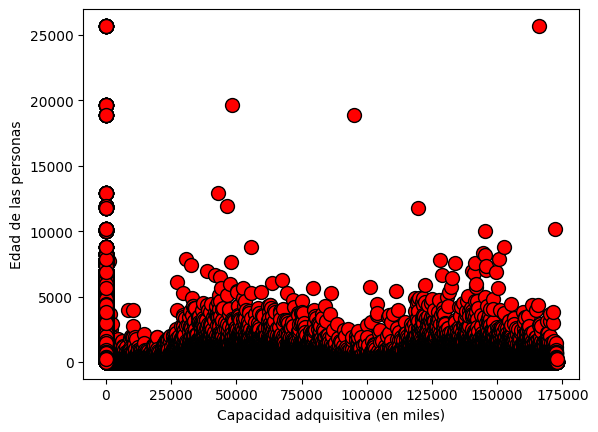

In [ ]:
plotData(X, y)

In [ ]:
# Añadir nuevas características al conjunto de datos X, que son los cuadrados de las características originales
X = np.concatenate([X, X * X], axis=1)

In [ ]:
print(X)

[[ 0.00000000e+00 -1.35980713e+00 -7.27811733e-02 ...  3.57644242e-02
   1.78378400e-02  4.43231060e-04]
 [ 0.00000000e+00  1.19185711e+00  2.66150712e-01 ...  1.58494333e-02
   8.06960702e-05  2.16801158e-04]
 [ 1.00000000e+00 -1.35835406e+00 -1.34016307e+00 ...  1.93478562e-02
   3.06393181e-03  3.57028245e-03]
 ...
 [ 1.72788000e+05  1.91956501e+00 -3.01253846e-01 ...  7.63362103e-03
   1.98449948e-05  7.05477614e-04]
 [ 1.72788000e+05 -2.40440050e-01  5.30482513e-01 ...  2.98846408e-01
   1.18419523e-02  1.09271108e-02]
 [ 1.72792000e+05 -5.33412522e-01 -1.89733337e-01 ...  6.69561081e-01
   5.83371660e-06  1.86292862e-04]]


En la siguiente celda primero reemplaza los valores `NaN` en el DataFrame `sin` con la media de cada columna para asegurar que no haya datos faltantes. Luego, convierte el DataFrame en un array de `numpy` para su procesamiento posterior. La función `featureNormalize` calcula la media y la desviación estándar de cada columna del array, normalizando los datos al restar la media y dividir por la desviación estándar. También maneja posibles problemas de división por cero al reemplazar desviaciones estándar de cero por uno.

In [ ]:
# Sustituir los valores NaN en el DataFrame con la media de cada columna
sin.fillna(df.mean(), inplace=True)

# Convertir el DataFrame a un array de numpy para su procesamiento
X = sin.to_numpy()

def featureNormalize(X):
    # Calcular la media y la desviación estándar de cada columna
    mu = np.mean(X, axis=0)
    sigma = np.std(X, axis=0)
    sigma = np.where(sigma == 0, 1, sigma)  # Evitar división por cero reemplazando ceros en sigma por 1
    # Normalizar los datos restando la media y dividiendo por la desviación estándar
    X_norm = (X - mu) / sigma
    return X_norm, mu, sigma

In [ ]:
# Aplicar la normalización de características a los datos cargados
X_norm, mu, sigma = featureNormalize(X)

#print(X)
#print('Media calculada:', mu)
#print('Desviación estandar calculada:', sigma)
#print(X_norm)

In [ ]:
print(X_norm)

[[-1.99658302 -0.69424232 -0.04407492 ...  0.33089162 -0.06378115
   0.24496426]
 [-1.99658302  0.60849633  0.16117592 ... -0.02225568  0.04460752
  -0.34247454]
 [-1.99656197 -0.69350046 -0.81157783 ... -0.13713686 -0.18102083
   1.16068593]
 ...
 [ 1.6419735   0.98002374 -0.18243372 ...  0.01103672 -0.0804672
  -0.0818393 ]
 [ 1.6419735  -0.12275539  0.32125034 ...  0.26960398  0.31668678
  -0.31324853]
 [ 1.64205773 -0.27233093 -0.11489898 ... -0.00598394  0.04134999
   0.51435531]]


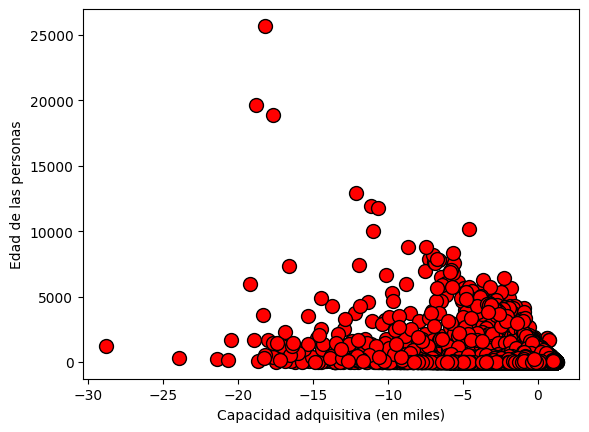

In [ ]:
# Graficar la segunda característica normalizada frente a los valores de y
plotData(X_norm[:, 1], y)

In [ ]:
# Añadir una columna de unos a X para incluir el término de intersección
X = np.concatenate([np.ones((m, 1)), X_norm], axis=1)

In [ ]:
print(X)

[[ 1.         -1.99658302 -0.69424232 ...  0.33089162 -0.06378115
   0.24496426]
 [ 1.         -1.99658302  0.60849633 ... -0.02225568  0.04460752
  -0.34247454]
 [ 1.         -1.99656197 -0.69350046 ... -0.13713686 -0.18102083
   1.16068593]
 ...
 [ 1.          1.6419735   0.98002374 ...  0.01103672 -0.0804672
  -0.0818393 ]
 [ 1.          1.6419735  -0.12275539 ...  0.26960398  0.31668678
  -0.31324853]
 [ 1.          1.64205773 -0.27233093 ... -0.00598394  0.04134999
   0.51435531]]


<a id="section5"></a>
### 2.2 Descenso por el gradiente



La función `computeCostMulti` calcula el costo de una regresión lineal múltiple utilizando los parámetros `theta`. Primero, determina el número de ejemplos en el conjunto de datos. Luego, calcula las predicciones del modelo usando `theta` y calcula el costo como el promedio de los errores al cuadrado entre las predicciones y los valores reales. Este costo se devuelve como una medida de qué tan bien el modelo se ajusta a los datos.

In [ ]:
def computeCostMulti(X, y, theta):
    # Calcula el costo de la regresión lineal múltiple usando el parámetro theta
    # Número de ejemplos en el conjunto de datos
    m = y.shape[0]
    # Inicializar el valor del costo
    J = 0
    # Calcular las predicciones del modelo
    h = np.dot(X, theta)
    # Calcular el costo como el promedio de los errores al cuadrado
    J = (1 / (2 * m)) * np.sum(np.square(h - y))
    return J


La función `gradientDescentMulti` optimiza los parámetros `theta` de un modelo de regresión lineal múltiple usando el método de descenso por gradiente. Primero, inicializa un historial para el costo durante las iteraciones. Luego, en cada iteración, calcula las predicciones del modelo, el error entre las predicciones y los valores reales, y actualiza `theta` en función del gradiente. Después, guarda el costo actual en el historial. Finalmente, devuelve los parámetros optimizados `theta` y el historial de costos `J_history`, mostrando cómo el costo cambia durante el proceso de optimización.

In [ ]:
def gradientDescentMulti(X, y, theta, alpha, num_iters):
    # Realiza la optimización de los parámetros theta usando el método de descenso por gradiente

    # Número de ejemplos en el conjunto de datos
    m = len(y)
    # Inicializar el historial del costo para cada iteración
    J_history = np.zeros(num_iters)

    for i in range(num_iters):
        # Calcular las predicciones del modelo
        predictions = X.dot(theta)
        # Calcular el error entre las predicciones y los valores reales
        errors = predictions - y
        # Actualizar los parámetros theta usando la regla de actualización del gradiente
        theta = theta - (alpha / m) * (X.T.dot(errors))
        # Guardar el costo actual en el historial
        J_history[i] = (1 / (2 * m)) * np.sum(np.square(errors))

    return theta, J_history

#### 3.2.1 Seleccionando coheficientes de aprendizaje
1. **Se estableció** una semilla para asegurar resultados reproducibles y se generaron datos aleatorios para características y variable objetivo.
2. **Se añadió** una columna de unos para incluir el término de intersección y se inicializaron los parámetros del modelo, ajustándolos mediante el descenso por gradiente.
3. **Se graficó** la convergencia del costo para verificar que el modelo se entrenaba correctamente y se imprimieron los parámetros optimizados.
4. **Se generaron** nuevos datos para realizar predicciones con el modelo ajustado, y **se guardaron** los resultados y parámetros en un archivo para su uso futuro.

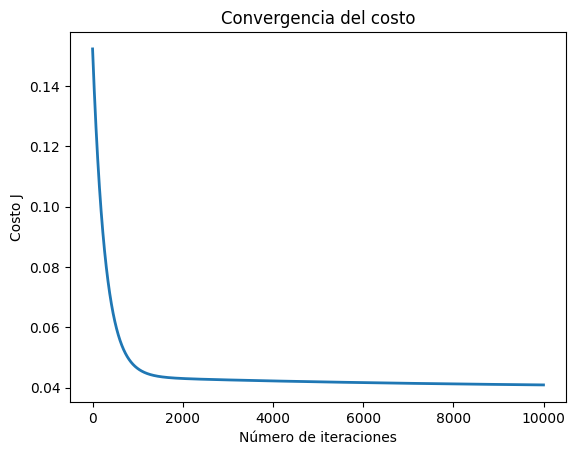

theta calculado por el descenso por el gradiente: [0.35311915 0.03330942 0.14533118 0.04744355]
Predicciones para nuevas entradas: [0.50626597 0.53251747 0.42697873 0.37683248 0.40249419 0.38117025
 0.4930725  0.45328642 0.4925937  0.48280543 0.46911734 0.47059988
 0.44683543 0.45865073 0.40165221 0.52992338 0.53098193 0.42743554
 0.45144313 0.50308972 0.43504059 0.42077498 0.45214766 0.47877056
 0.54488833 0.52572049 0.45526816 0.40482087 0.46345125 0.54954084
 0.49088844 0.45978956 0.43845685 0.43277538 0.49551325 0.51153415
 0.43136915 0.50457195 0.48683465 0.50449405 0.41374829 0.39560708
 0.50904852 0.386429   0.42435386 0.47383571 0.51352899 0.48986451
 0.42068405 0.47015767 0.41456575 0.47560391 0.44990661 0.47892992
 0.53633021 0.50632646 0.56512252 0.39818117 0.43605118 0.49058932
 0.47542499 0.46862216 0.36604827 0.53349068 0.46683796 0.46132732
 0.51636049 0.46591891 0.45623717 0.45329109 0.46341522 0.38792429
 0.48745208 0.47177164 0.53883435 0.52699974 0.38872939 0.4487660

In [ ]:
# Generar datos de prueba para el ejemplo
np.random.seed(0)  # Establecer una semilla para garantizar resultados reproducibles
m = 100  # Número de ejemplos de entrenamiento
n = 3  # Número de características (sin contar el término de intersección)

# Crear datos aleatorios para las características y la variable objetivo
X = np.random.rand(m, n)  # Datos de características
y = np.random.rand(m)  # Datos de la variable objetivo

# Añadir una columna de unos para el término de sesgo (intersección)
X = np.hstack([np.ones((m, 1)), X])

# Inicializar los parámetros del modelo
alpha = 0.001  # Tasa de aprendizaje
num_iters = 10000  # Número de iteraciones para el descenso por gradiente
theta = np.zeros(X.shape[1])  # Inicializar los parámetros theta en cero

# Ejecutar el algoritmo de descenso por gradiente para ajustar los parámetros theta
theta, J_history = gradientDescentMulti(X, y, theta, alpha, num_iters)

# Graficar cómo cambia el costo durante las iteraciones para verificar la convergencia
plt.plot(np.arange(len(J_history)), J_history, lw=2)
plt.xlabel('Número de iteraciones')
plt.ylabel('Costo J')
plt.title('Convergencia del costo')
plt.show()

# Imprimir los parámetros theta calculados por el descenso por gradiente
print('theta calculado por el descenso por el gradiente:', theta)

# Generar nuevos datos para hacer predicciones
num_predicciones = 100  # Número de nuevas predicciones a realizar
X_pred = np.random.rand(num_predicciones, n)  # Nuevos datos de características
X_pred = np.hstack([np.ones((num_predicciones, 1)), X_pred])  # Añadir columna de unos para el término de intersección

# Realizar las predicciones usando los parámetros theta ajustados
predicciones = X_pred.dot(theta)
print('Predicciones para nuevas entradas:', predicciones)

# Guardar los datos, predicciones y parámetros en un archivo para futuras referencias
np.savez('predicciones_datos.npz', X=X, y=y, X_pred=X_pred, predicciones=predicciones, theta=theta)

Se realizan las siguientes acciones:

1. **Define la función `plotData`**: Esta función grafica los puntos de datos originales en color rojo con marcadores en forma de 'x'.

2. **Carga datos y predicciones**: Se lee un archivo guardado (`predicciones_datos.npz`) que contiene datos de características, valores reales, nuevos datos para predicción, las predicciones realizadas y los parámetros del modelo.

3. **Crea una nueva figura**: Configura el tamaño de la figura para la gráfica.

4. **Grafica los datos originales**: Usa la función `plotData` para mostrar los puntos originales en la gráfica.

5. **Dibuja la línea de ajuste**: Grafica la línea de regresión utilizando los parámetros del modelo `theta`.

6. **Grafica las predicciones**: Muestra las predicciones realizadas en los nuevos datos con marcadores en color azul.

7. **Añade etiquetas, título y leyenda**: Etiqueta los ejes, añade un título y una leyenda a la gráfica.

8. **Muestra la gráfica**: Presenta la gráfica con los datos originales, la línea de ajuste y las predicciones.

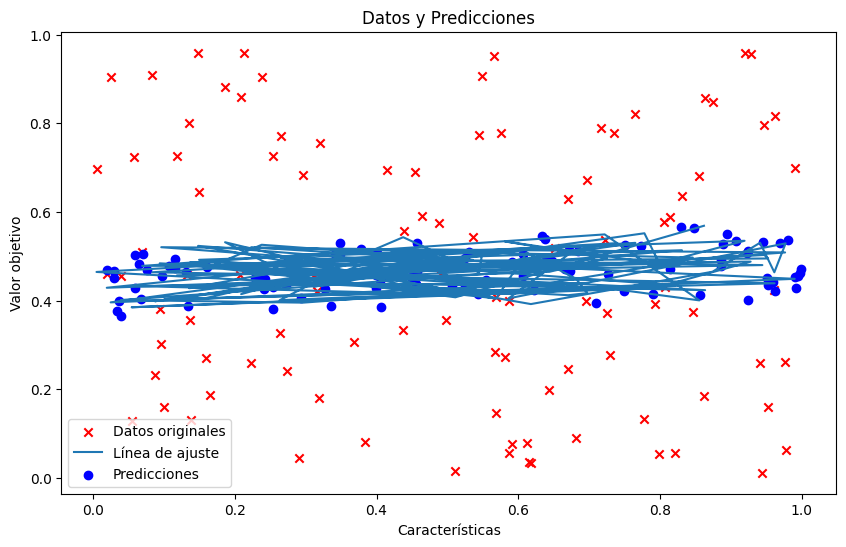

In [ ]:
def plotData(X, y):
    # Grafica los puntos de datos originales en color rojo con marcador en forma de 'x'
    plt.scatter(X, y, color='red', marker='x', label='Datos originales')

# Cargar los datos y las predicciones desde un archivo guardado
data = np.load('predicciones_datos.npz')
X = data['X']  # Datos de características
y = data['y']  # Valores reales de la variable objetivo
X_pred = data['X_pred']  # Nuevos datos para predecir
predicciones = data['predicciones']  # Predicciones realizadas
theta = data['theta']  # Parámetros del modelo

# Crear una nueva figura para la gráfica
plt.figure(figsize=(10, 6))

# Graficar los datos originales usando la función definida
plotData(X[:, 1], y)

# Graficar la línea de ajuste (regresión) calculada con theta
plt.plot(X[:, 1], X.dot(theta), '-', label='Línea de ajuste')

# Graficar las predicciones realizadas en nuevos datos
plt.scatter(X_pred[:, 1], predicciones, color='blue', marker='o', label='Predicciones')

# Añadir etiquetas a los ejes, título y leyenda a la gráfica
plt.xlabel('Características')
plt.ylabel('Valor objetivo')
plt.title('Datos y Predicciones')
plt.legend()

# Mostrar la gráfica
plt.show()